In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
sys.path.append('../')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [6]:
%matplotlib notebook

In [7]:
# Loading in the compressed data
Flattenedfilename = 'Segments2_compr_flat_filt.npz'; print(Flattenedfilename)
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

Segments2_compr_flat_filt.npz
Segments2_compr_flat_filt_roughness.jpg
25


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


<IPython.core.display.Javascript object>


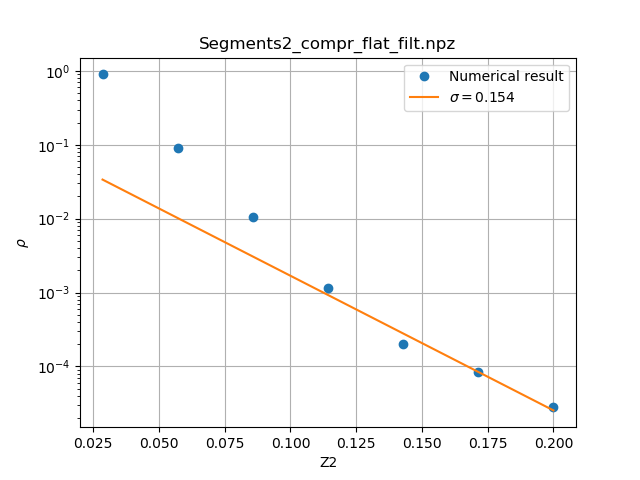

In [13]:
# Histogram accumulation
countslist = []
accumlist = [] # all

# Fill in a default
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
print(accumlist)

# Parameters for accumulating 
plotthisone = -1
counts_total = []
bins_total = []
numforZ2hist = 8
Z2minforhist = 1e-5
Z2maxforhist = .2
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,numforZ2hist); #print(Z2bins)

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Plot one of them
    if(isegment==plotthisone):
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        ax.set_title(Flattenedfilename+str(isegment))
        ax.view_init(30, -10)
        
    # Get the probability distribution in Z2
    counts, binstot = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins)
    
    # Accumulate
    if isegment in accumlist:
        countslist.append(counts)

# Sum them up
countstot = np.sum(countslist,axis=0)
countstot = countstot/np.sum(countstot)

# Graphing it
fig = plt.figure()
plt.semilogy(binstot, countstot, 'o', label='Numerical result')
plt.grid(True)
plt.xlabel('Z2')
plt.ylabel(r'$\rho$')
plt.title(Flattenedfilename)

# Line fitting
subset = np.array([i for i in range(3,len(binstot))])
logcounts = np.log(countstot[subset])
p = np.polyfit(binstot[subset], logcounts, 1)
sigma = 1/(-p[0])**.5
sigma = int(sigma*1000)/1000
plt.semilogy(binstot, np.exp(np.polyval(p,binstot)), label=r'$\sigma = $'+str(sigma))

# Add a legend
plt.legend()

In [ ]:
plt.savefig(Roughnessfilename)